# Explaining Regression Models

In [1]:
from sklearn.utils import Bunch
import requests
import pandas as pd
import numpy as np

def load_boston(*, return_X_y=False):
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    columns = pd.read_csv(data_url, sep="\s+", skiprows=7, nrows=14, usecols=[0], header=None)
    resp = requests.get(data_url)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    feature_names = columns[0].values[:-1]
    DESCR = resp.text[:resp.text.find("$1000's")+7]
    if return_X_y:
        return data, target
    return Bunch(data=data, target=target, feature_names=feature_names, DESCR=DESCR)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import (
    model_selection,
    preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [3]:
import xgboost as xgb
xgr = xgb.XGBRegressor(
    random_state=42, base_score=0.5
)
xgr.fit(bos_X_train, bos_y_train)

XGBRegressor(base_score=0.5, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [4]:
sample_idx = 5
xgr.predict(bos_X.iloc[[sample_idx]])

array([28.698956], dtype=float32)

In [5]:
import shap
shap.initjs()
exp = shap.TreeExplainer(xgr)
vals = exp.shap_values(bos_X)

In [6]:
shap.force_plot(
    exp.expected_value,
    vals[sample_idx],
    bos_X.iloc[sample_idx],
)

In [7]:
shap.force_plot(
    exp.expected_value, vals, bos_X
)

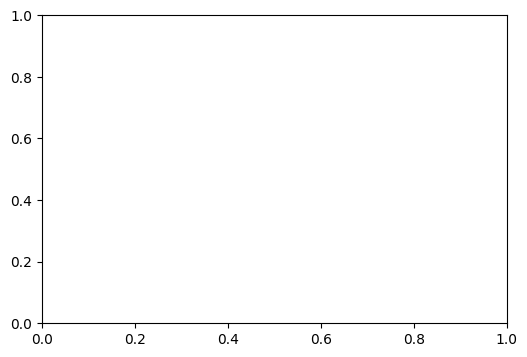

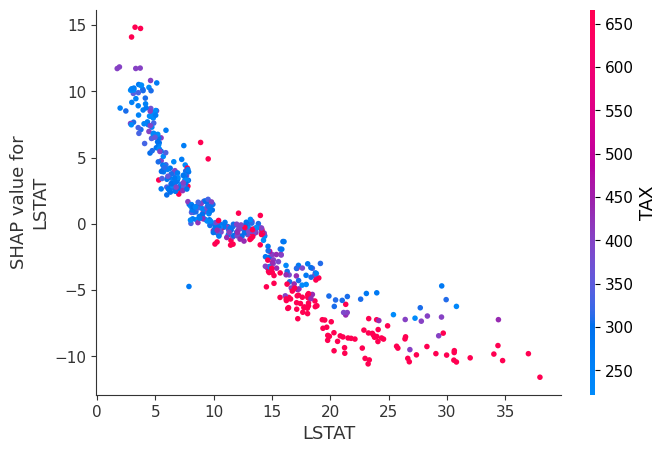

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
shap.dependence_plot("LSTAT", vals, bos_X)
# fig.savefig(
#     "images/mlpr_1603.png",
#     bbox_inches="tight",
#     dpi=300,
# )

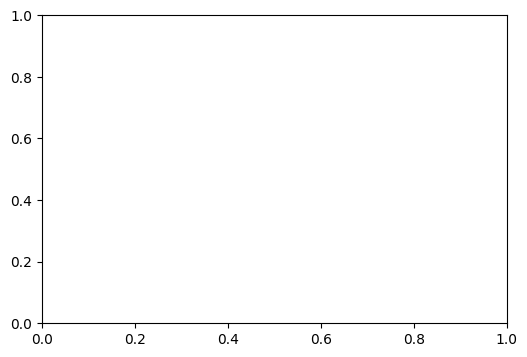

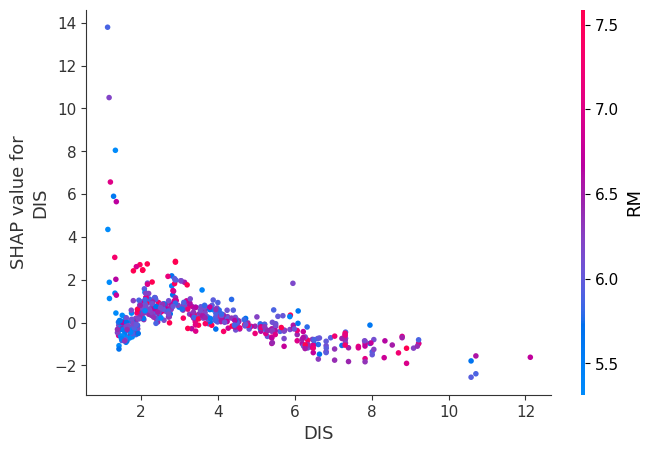

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
shap.dependence_plot(
    "DIS", vals, bos_X, interaction_index="RM"
)
# fig.savefig(
#     "images/mlpr_1604.png",
#     bbox_inches="tight",
#     dpi=300,
# )

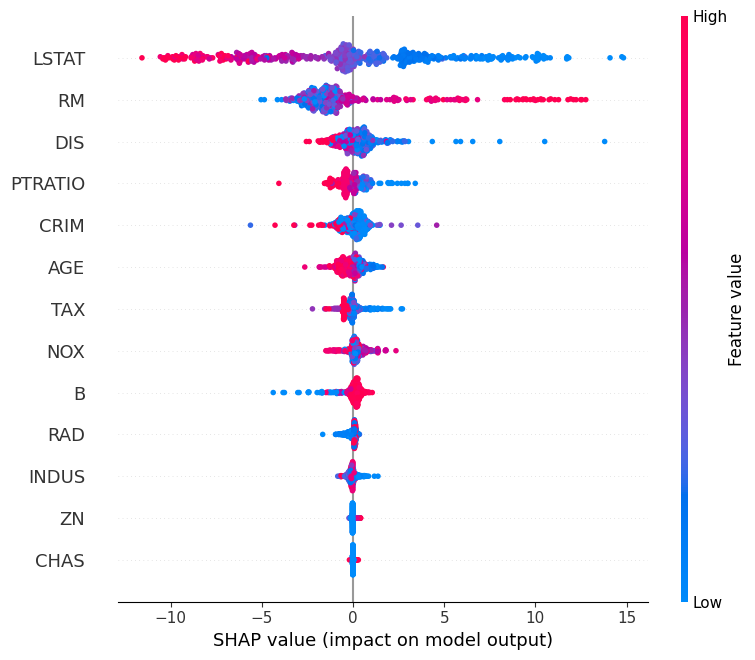

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
shap.summary_plot(vals, bos_X)
# fig.savefig(
#     "images/mlpr_1605.png",
#     bbox_inches="tight",
#     dpi=300,
# )